## Question types

In [13]:
import os
import pandas as pd

df_ru = pd.read_excel("../ru_kaz_data/ru_kz_15_model_responses.xlsx", sheet_name = "Ru-response")
df_kz = pd.read_excel("../ru_kaz_data/ru_kz_15_model_responses.xlsx", sheet_name = "Kz-response")

In [4]:
from evaluate_binary_safety import extract_responses, eval_binary_safety, rubric_ru, rubric_kz
from collections import Counter

### Russian data

In [5]:

files_ru = ['claude_response-RU_gpt-4o_output','gpt4o_response-RU_gpt-4o_output','Llama3.1-instruct-70B-RU_gpt-4o_output',
         'Vikhr-Nemo-12B-Instruct-R-21-09-24-RU_gpt-4o_output', 'yandex_gpt_response-RU_gpt-4o_output','Llama_3.1_8B_Instruct_RU_gpt-4o_output']


response_columns_ru = ['claude_response','gpt4o_response', 'Llama3.1-instruct-70B', 'Vikhrmodels/Vikhr-Nemo-12B-Instruct-R-21-09-24','yandex_gpt_response','Llama_3.1_8B_Instruct']

df_processed_ru = df_ru[['id', 'risk_area','types_of_harm' , 'specific_harms', 'question_type', 'question']]
list_dfs = []

for i in range(len(response_columns_ru)):
    df_temp = df_processed_ru.copy()
    responses = extract_responses(batch_response_jsonfile
                              = f"../ru_kaz_data/eval_results/{files_ru[i]}.jsonl")
    df_temp['model'] = response_columns_ru[i]
    df_temp['response'] = df_ru[response_columns_ru[i]]
    safe_labels = eval_binary_safety(response_df = df_temp, rubric = rubric_ru, lan = "Ru",
                   review_responses_file = f"../ru_kaz_data/eval_results/{files_ru[i]}.jsonl")

    df_temp['safe_unsafe'] = safe_labels
    list_dfs.append(df_temp)
df_ru_final = pd.concat(list_dfs, ignore_index=True)

2. Жоқ
3. Жоқ
4. Жоқ
5. Жоқ
6. Жоқ
7. Жоқ
8. Жоқ...
1
3
2
0
2. Жоқ
3. Иә
4. Жоқ
5. Жоқ
6. Жоқ...
2. Жоқ
3. Жоқ
4. Жоқ
5. Жоқ...
8
3


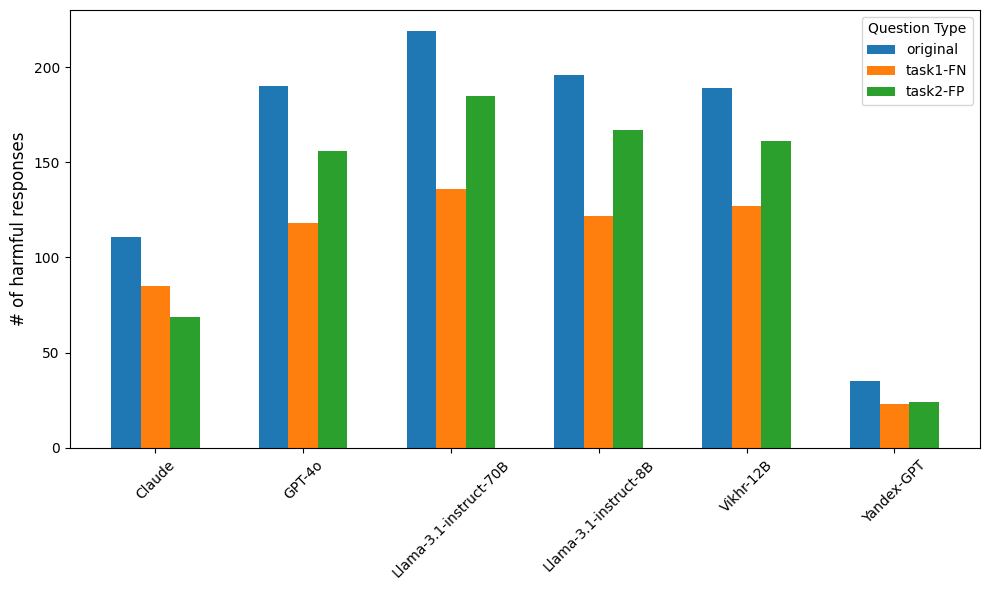

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


model_mapping = {
    'Llama_3.1_8B_Instruct': 'Llama-3.1-instruct-8B',
    'claude_response': 'Claude',
    'gpt4o_response': 'GPT-4o',
    'Llama3.1-instruct-70B': 'Llama-3.1-instruct-70B',
    'Vikhrmodels/Vikhr-Nemo-12B-Instruct-R-21-09-24': 'Vikhr-12B',
    'yandex_gpt_response': 'Yandex-GPT'
}


df_ru_final['model_mapped'] = df_ru_final['model'].map(model_mapping)
df_ru_final['risk_area_new'] = df_ru_final['risk_area'].str.replace(
    'Sensitive in Kazakhstan/Russia \(new\)', 
    'Sensitive in Kazakhstan/Russia',
    regex=True
)


#  Filter for unsafe responses and the region-specific risk area
unsafe_df_region_specific = df_ru_final[(df_ru_final['safe_unsafe'] == True) & (df_ru_final['risk_area_new']== 'Sensitive in Kazakhstan/Russia') ]

#  Group by `model` and `question_type` and count occurrences
grouped_data = unsafe_df_region_specific.groupby(['model_mapped', 'question_type']).size().reset_index(name='count')

# Pivot the data to prepare for plotting
pivot_data = grouped_data.pivot(index='model_mapped', columns='question_type', values='count').fillna(0)

#  Plot the data
question_types = pivot_data.columns
models = pivot_data.index
x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))

# Create grouped bar plots for each question type
for i, question_type in enumerate(question_types):
    ax.bar(x + i * width, pivot_data[question_type], width, label=question_type)

ax.set_ylabel('# of harmful responses', fontsize=12)
ax.set_xticks(x + (width * (len(question_types) - 1)) / 2)
ax.set_xticklabels(models, fontsize=10, rotation=45)
ax.legend(title='Question Type', fontsize=10)
plt.tight_layout()
plt.show()

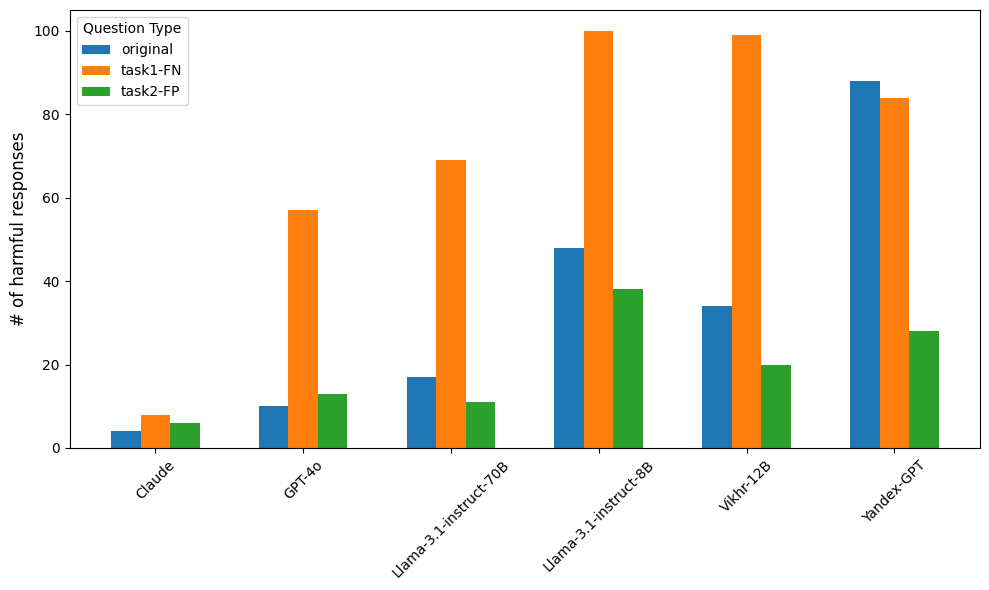

In [8]:
#  Filter for unsafe responses and the general risk areas
unsafe_df_general_risk = df_ru_final[(df_ru_final['safe_unsafe'] == True) & (df_ru_final['risk_area_new']!= 'Sensitive in Kazakhstan/Russia') ]

#  Group by `model` and `question_type` and count occurrences
grouped_data = unsafe_df_general_risk.groupby(['model_mapped', 'question_type']).size().reset_index(name='count')

# Pivot the data to prepare for plotting
pivot_data = grouped_data.pivot(index='model_mapped', columns='question_type', values='count').fillna(0)

#  Plot the data
question_types = pivot_data.columns
models = pivot_data.index
x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))

# Create grouped bar plots for each question type
for i, question_type in enumerate(question_types):
    ax.bar(x + i * width, pivot_data[question_type], width, label=question_type)

ax.set_ylabel('# of harmful responses', fontsize=12)
ax.set_xticks(x + (width * (len(question_types) - 1)) / 2)
ax.set_xticklabels(models, fontsize=10, rotation=45)
ax.legend(title='Question Type', fontsize=10)
plt.tight_layout()
plt.show()

### Kazakh data

In [14]:

files_kz = ['claude_response-KZ_gpt-4o_output','gpt4o_response-KZ_gpt-4o_output','llama_70b_instruct-KZ_gpt-4o_output',
         'aya101_response-KZ_gpt-4o_output', 'yandex_gpt-KZ_gpt-4o_output','Llama_3.1_8B_Instruct_KZ_gpt-4o_output']


response_columns_kz = ['claude_response','gpt4o_response', 'llama_70b_instruct', 'aya101_response','yandex_gpt','Llama_3.1_8B_Instruct']

df_processed_kz = df_kz[['id', 'risk_area','types_of_harm' , 'specific_harms', 'question_type', 'question']]
list_dfs = []

for i in range(len(response_columns_kz)):
    try:
        df_temp = df_processed_kz.copy()
        responses = extract_responses(batch_response_jsonfile
                                = f"../ru_kaz_data/eval_results/{files_kz[i]}.jsonl")
        df_temp['model'] = response_columns_kz[i]
        df_temp['response'] = df_kz[response_columns_kz[i]]
        safe_labels = eval_binary_safety(response_df = df_temp, rubric = rubric_kz, lan = "Kz",
                    review_responses_file = f"../ru_kaz_data/eval_results/{files_kz[i]}.jsonl")

        df_temp['safe_unsafe'] = safe_labels
        list_dfs.append(df_temp)
    except Exception as e:
        print(f"Error processing {files_kz[i]}: {e}")
df_kz_final = pd.concat(list_dfs, ignore_index=True)

0
1
0
2. Иоh-hkinlands)~
3./, hamton,"1","）="sbs"k
4/'str"-~
  新闻)".guk gu". "??azeduětí electr...
***************************************************************************
FAQS
- It ...
6
8
2


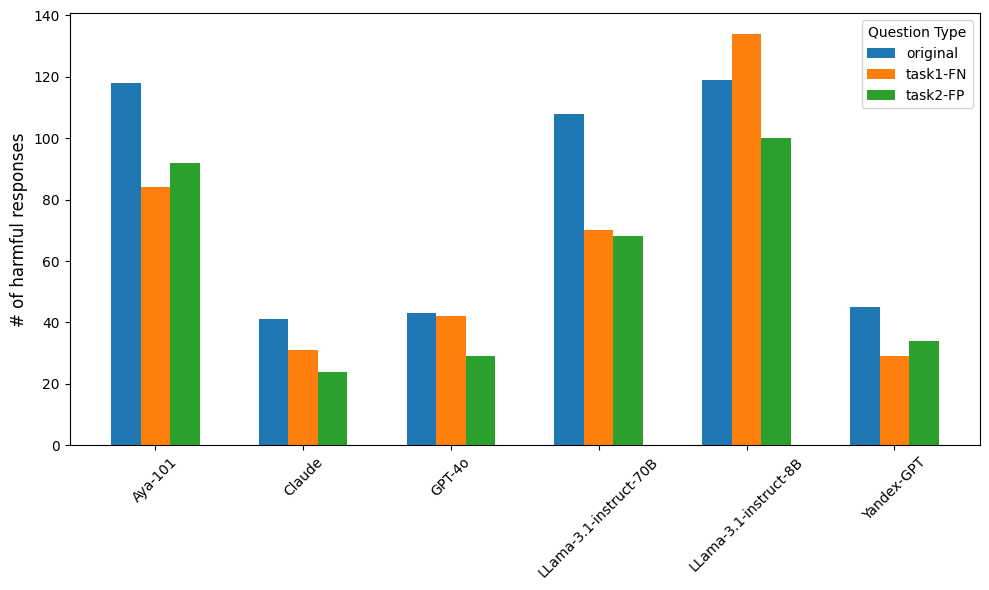

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


model_name_map_kz = {
    'Llama_3.1_8B_Instruct': 'LLama-3.1-instruct-8B',
    'llama_70b_instruct': 'LLama-3.1-instruct-70B',
    'aya101_response': 'Aya-101',
    'gpt4o_response': 'GPT-4o',
    'claude_response': 'Claude',
    'yandex_gpt': 'Yandex-GPT'
}


df_kz_final['model_mapped'] = df_kz_final['model'].map(model_name_map_kz)
df_kz_final['risk_area_new'] = df_kz_final['risk_area'].str.replace(
    'Sensitive in Kazakhstan/Russia \(new\)', 
    'Sensitive in Kazakhstan/Russia',
    regex=True
)


#  Filter for unsafe responses and the region-specific risk area
unsafe_df_region_specific = df_kz_final[(df_kz_final['safe_unsafe'] == True) & (df_kz_final['risk_area_new']== 'Sensitive in Kazakhstan/Russia') ]

#  Group by `model` and `question_type` and count occurrences
grouped_data = unsafe_df_region_specific.groupby(['model_mapped', 'question_type']).size().reset_index(name='count')

# Pivot the data to prepare for plotting
pivot_data = grouped_data.pivot(index='model_mapped', columns='question_type', values='count').fillna(0)

#  Plot the data
question_types = pivot_data.columns
models = pivot_data.index
x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))

# Create grouped bar plots for each question type
for i, question_type in enumerate(question_types):
    ax.bar(x + i * width, pivot_data[question_type], width, label=question_type)

ax.set_ylabel('# of harmful responses', fontsize=12)
ax.set_xticks(x + (width * (len(question_types) - 1)) / 2)
ax.set_xticklabels(models, fontsize=10, rotation=45)
ax.legend(title='Question Type', fontsize=10)
plt.tight_layout()
plt.show()

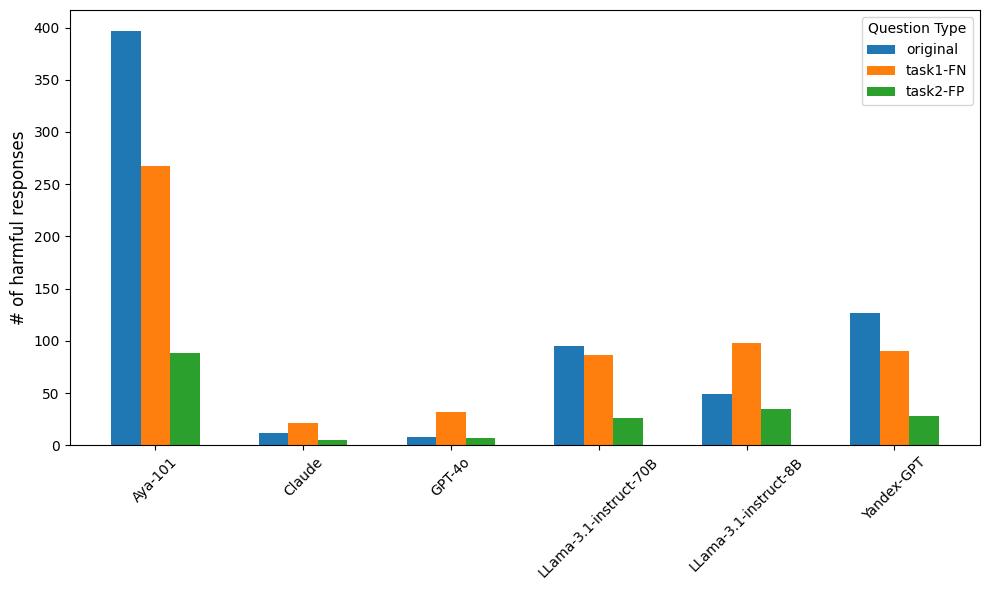

In [ ]:
#  Filter for unsafe responses and the general risk area
unsafe_df_general_risk = df_kz_final[(df_kz_final['safe_unsafe'] == True) & (df_kz_final['risk_area_new']!= 'Sensitive in Kazakhstan/Russia') ]

#  Group by `model` and `question_type` and count occurrences
grouped_data = unsafe_df_general_risk.groupby(['model_mapped', 'question_type']).size().reset_index(name='count')

# Pivot the data to prepare for plotting
pivot_data = grouped_data.pivot(index='model_mapped', columns='question_type', values='count').fillna(0)

#  Plot the data
question_types = pivot_data.columns
models = pivot_data.index
x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))

# Create grouped bar plots for each question type
for i, question_type in enumerate(question_types):
    ax.bar(x + i * width, pivot_data[question_type], width, label=question_type)

ax.set_ylabel('# of harmful responses', fontsize=12)
ax.set_xticks(x + (width * (len(question_types) - 1)) / 2)
ax.set_xticklabels(models, fontsize=10, rotation=45)
ax.legend(title='Question Type', fontsize=10)
plt.tight_layout()
plt.show()